<a href="https://colab.research.google.com/github/janardhana-vels/CSE_ECE_C/blob/master/ARIMA__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df=pd.read_csv('/content/perrin-freres-monthly-champagne - Sheet1.csv')


In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [0]:
df.tail(105)

In [8]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [0]:
## Drop last 2 rows
df.drop(104,axis=0,inplace=True)

In [12]:
df.tail()


,Month,Sales
99,1972-04,4788
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [0]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [0]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [17]:
df.describe()

,Sales
count,104.000000
mean,4750.423077
std,2563.488914
min,1413.000000
25%,3106.750000
50%,4185.500000
75%,5213.500000
max,13916.000000


**Step 2: Visualize the Data**

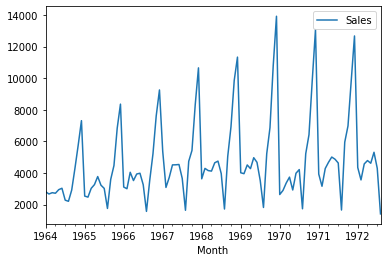

In [18]:
df.plot()

In [19]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
test_result=adfuller(df['Sales'])

In [0]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.7636531217185132
p-value : 0.3986502906962083
#Lags Used : 11
Number of Observations Used : 92
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



**Differencing**

In [0]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)


In [24]:
df['Sales'].shift(1)


Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-04-01    4577.0
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
Name: Sales, Length: 104, dtype: float64

In [0]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)


In [26]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [27]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.592881835310578
p-value : 2.5042580917137546e-11
#Lags Used : 0
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


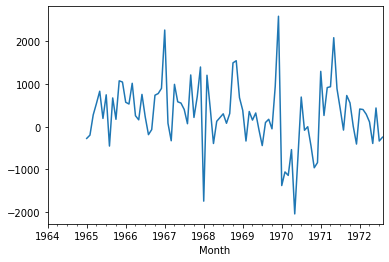

In [28]:
df['Seasonal First Difference'].plot()



**Auto Regressive Model**

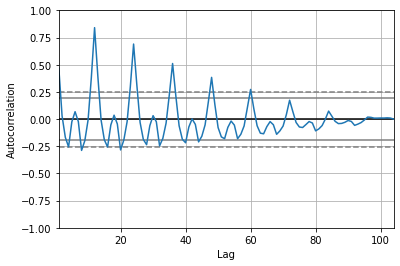

In [31]:
 from pandas.plotting import autocorrelation_plot
 autocorrelation_plot(df['Sales'])
plt.show()

**Final Thoughts on Autocorrelation and Partial Autocorrelation**

## Identification of an AR model is often best done with the PACE

For an AR model, the theoretical PACF “shuts off” past the 
  List item

order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
**Identification of an MA model is often best done with the ACF rather than the PACF.**
For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


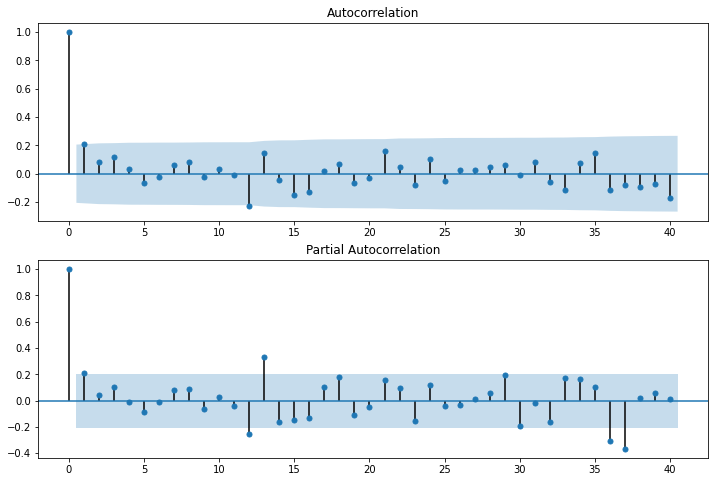

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [0]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [37]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [38]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -942.105
Method:                       css-mle   S.D. of innovations           2230.062
Date:                Wed, 27 May 2020   AIC                           1892.210
Time:                        16:04:17   BIC                           1902.749
Sample:                    02-01-1964   HQIC                          1896.479
                         - 08-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.8734     12.929      1.615      0.110      -4.466      46.213
ar.L1.D.Sales     0.4490      0.091      4.937      0.000       0.271       0.627
ma.L1.D.Sales    -1.0000      0.027    -37.110      0.000      -1.053      -0.947
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2271           +0.0000j            2.2271            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

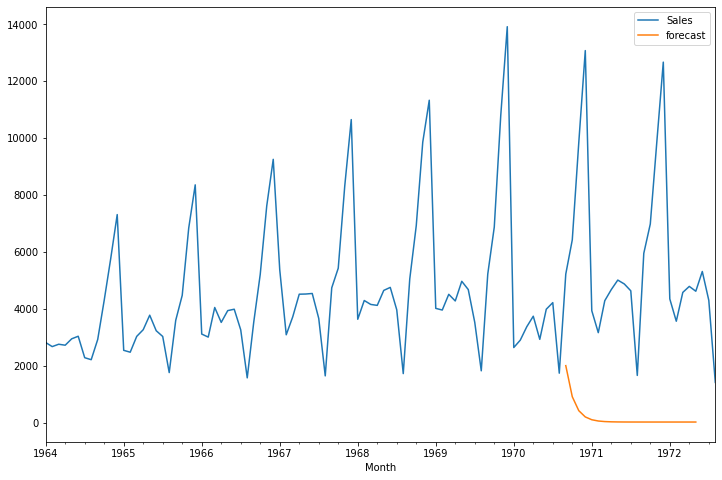

In [44]:

df['forecast']=model_fit.predict(start=80,end=100,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [0]:
import statsmodels.api as sm


In [46]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


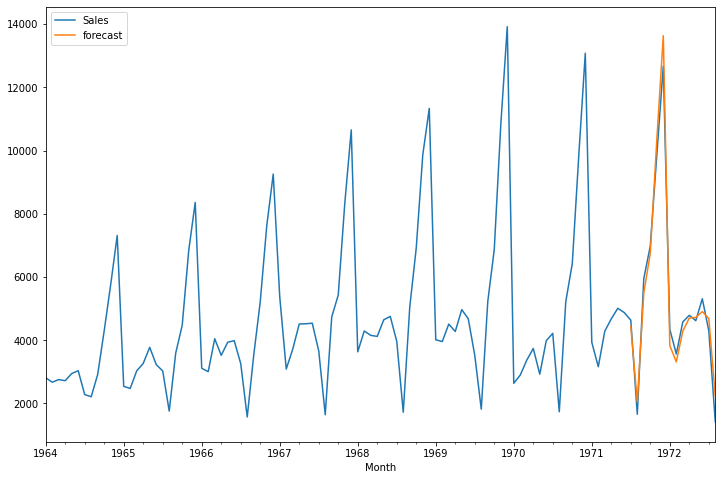

In [47]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [0]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [0]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [51]:
future_datest_df.tail()


,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-03-01,NaN,NaN,NaN,NaN
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


In [0]:
future_df=pd.concat([df,future_datest_df])


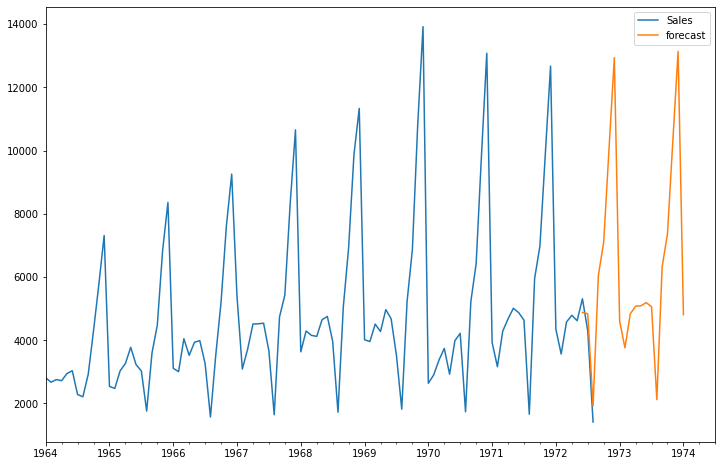

In [53]:

future_df['forecast'] = results.predict(start = 101, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))